In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-health-and-attendance-data/student_monnitoring_data.csv


**EDA of Student Health Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/student-health-and-attendance-data/student_monnitoring_data.csv")
df.shape

(15000, 9)

In [4]:
df.head(10)

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High
5,1,2024-12-06,8:00-14:00,Present,4.96,6.6,5,9,High
6,1,2024-12-07,11:00-15:00,Absent,2.93,6.8,4,5,High
7,1,2024-12-08,8:00-15:00,Absent,2.17,8.4,9,9,High
8,1,2024-12-09,11:00-13:00,Absent,4.40,5.9,4,4,High
9,1,2024-12-10,9:00-16:00,Late,1.44,7.7,3,7,Low


In [5]:
df.tail(10)

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
14990,500,2024-12-21,8:00-16:00,Present,3.82,6.7,6,9,High
14991,500,2024-12-22,9:00-12:00,Present,4.76,6.9,4,10,High
14992,500,2024-12-23,8:00-12:00,Absent,2.03,7.4,8,7,High
14993,500,2024-12-24,10:00-12:00,Present,1.86,5.5,2,1,Medium
14994,500,2024-12-25,11:00-12:00,Absent,3.89,5.2,3,2,High
14995,500,2024-12-26,9:00-16:00,Late,1.30,7.2,7,10,Low
14996,500,2024-12-27,9:00-15:00,Absent,1.07,7.9,4,6,High
14997,500,2024-12-28,11:00-14:00,Absent,1.67,7.2,3,5,High
14998,500,2024-12-29,11:00-14:00,Late,0.99,7.2,10,9,Medium
14999,500,2024-12-30,9:00-16:00,Present,4.50,5.2,1,4,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          15000 non-null  int64  
 1   Date                15000 non-null  object 
 2   Class Time          15000 non-null  object 
 3   Attendance Status   15000 non-null  object 
 4   Stress Level (GSR)  15000 non-null  float64
 5   Sleep Hours         15000 non-null  float64
 6   Anxiety Level       15000 non-null  int64  
 7   Mood Score          15000 non-null  int64  
 8   Risk Level          15000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


In [7]:
df.isnull()

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Student ID            0
Date                  0
Class Time            0
Attendance Status     0
Stress Level (GSR)    0
Sleep Hours           0
Anxiety Level         0
Mood Score            0
Risk Level            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Student ID,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score
count,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000
mean,250.50000,2.762538,6.996780,5.546867,5.471533
std,144.34209,1.301927,1.150973,2.870323,2.868984
min,1.00000,0.500000,5.000000,1.000000,1.000000
25%,125.75000,1.640000,6.000000,3.000000,3.000000
50%,250.50000,2.760000,7.000000,6.000000,5.000000
75%,375.25000,3.900000,8.000000,8.000000,8.000000
max,500.00000,5.000000,9.000000,10.000000,10.000000


In [11]:
df.columns

Index(['Student ID', 'Date', 'Class Time', 'Attendance Status',
       'Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score',
       'Risk Level'],
      dtype='object')

In [12]:
categorical = df.drop(['Student ID','Class Time','Date','Stress Level (GSR)','Sleep Hours','Anxiety Level','Mood Score'],axis=1)
categorical

,Attendance Status,Risk Level
0,Late,Low
1,Late,Medium
2,Late,High
3,Late,Low
4,Absent,High
...,...,...
14995,Late,Low
14996,Absent,High
14997,Absent,High
14998,Late,Medium


In [13]:
value,count=np.unique(df['Attendance Status'],return_counts=True)
value

array(['Absent', 'Late', 'Present'], dtype=object)

Text(0, 0.5, 'Count')

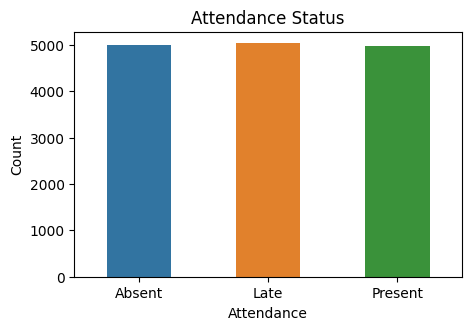

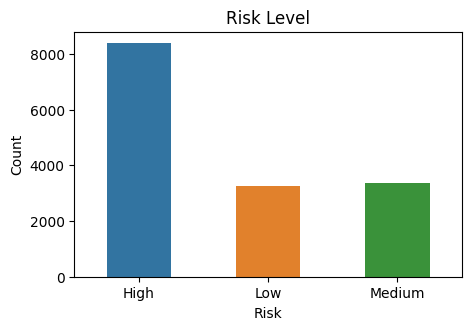

In [14]:
plt.figure(figsize=(5,7))
plt.subplot(2,1,1)
value,count=np.unique(df['Attendance Status'],return_counts=True)
sns.barplot(x=value,y=count,width=0.5)

plt.title('Attendance Status')
plt.xlabel('Attendance')
plt.ylabel('Count')

plt.figure(figsize=(5,7))
plt.subplot(2,1,2)
value,count=np.unique(df['Risk Level'],return_counts=True)
sns.barplot(x=value,y=count,width=0.5)

plt.title('Risk Level')
plt.xlabel('Risk')
plt.ylabel('Count')

In [15]:
numeric=df.drop(['Attendance Status','Risk Level','Student ID','Date','Class Time'],axis=1)
numeric

,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score
0,0.92,7.6,6,6
1,1.17,6.0,6,2
2,4.56,6.3,4,8
3,3.07,9.0,2,10
4,3.93,7.4,9,4
...,...,...,...,...
14995,1.30,7.2,7,10
14996,1.07,7.9,4,6
14997,1.67,7.2,3,5
14998,0.99,7.2,10,9


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


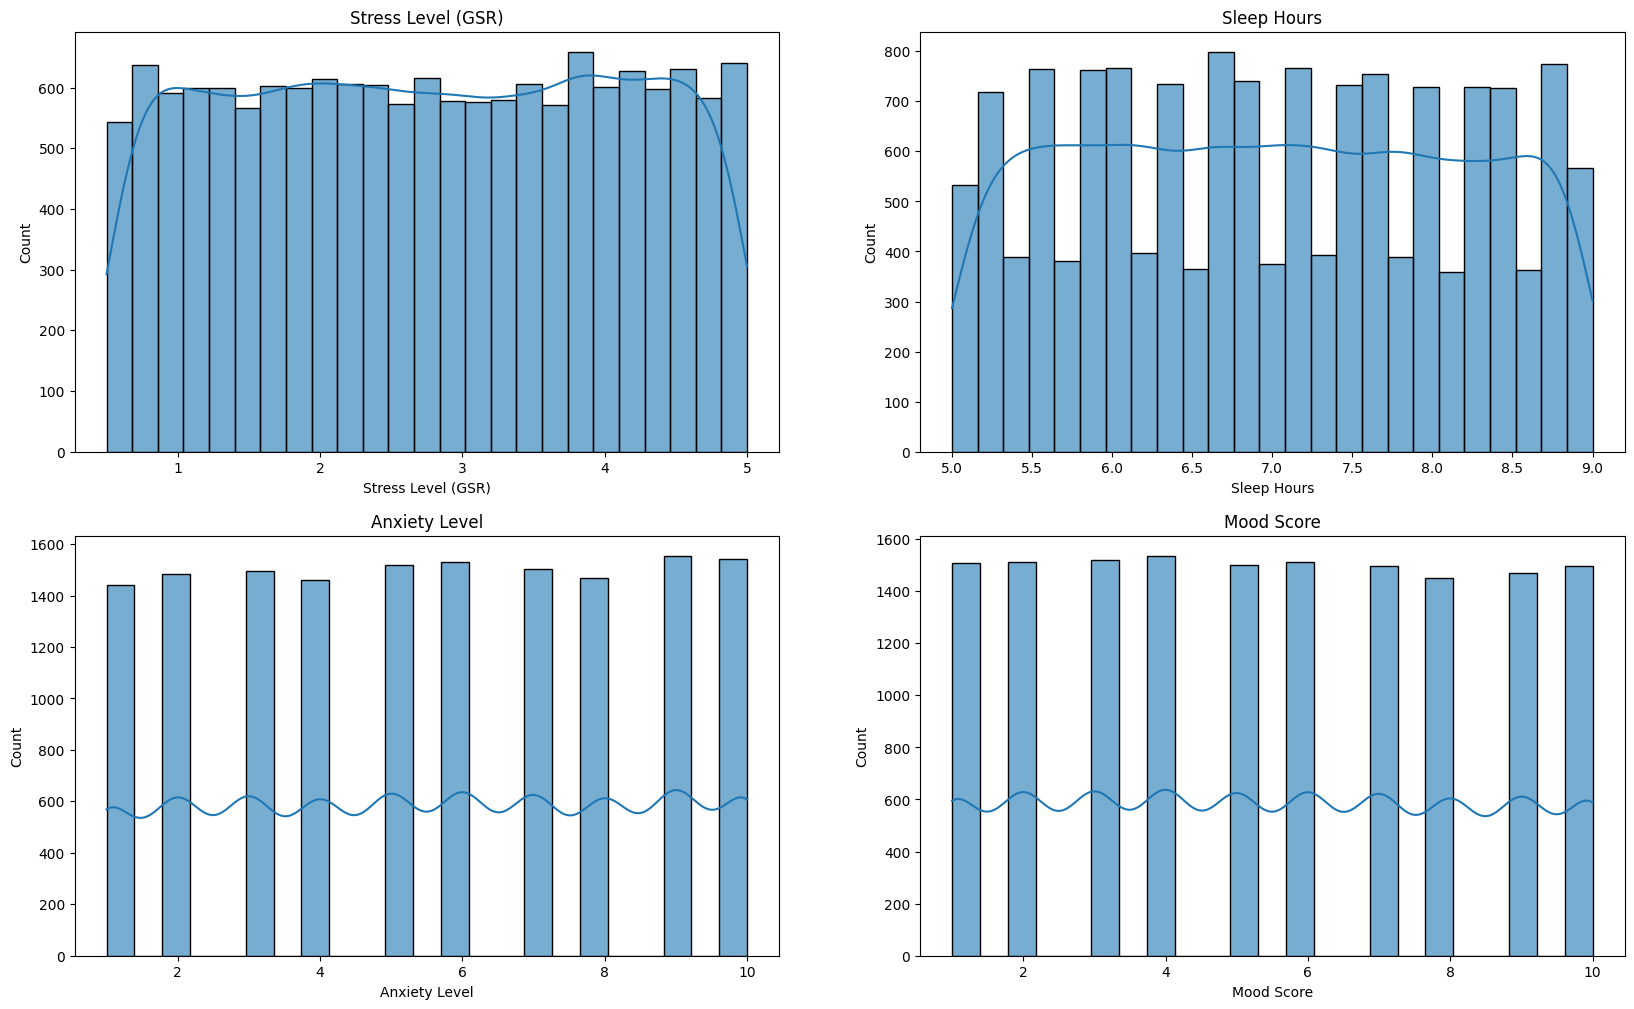

In [16]:
import warnings

def plot_multiple_histplots(df):
  columns = df.columns
  plt.figure(figsize=(20,12))
  
  for i in range(len(columns)):
      plt.subplot(2,2,i+1)
      sns.histplot(df[columns[i]],alpha=0.6,kde=True)
      warnings.filterwarnings("ignore")
      plt.title(columns[i])
  
  plt.show()

plot_multiple_histplots(numeric)

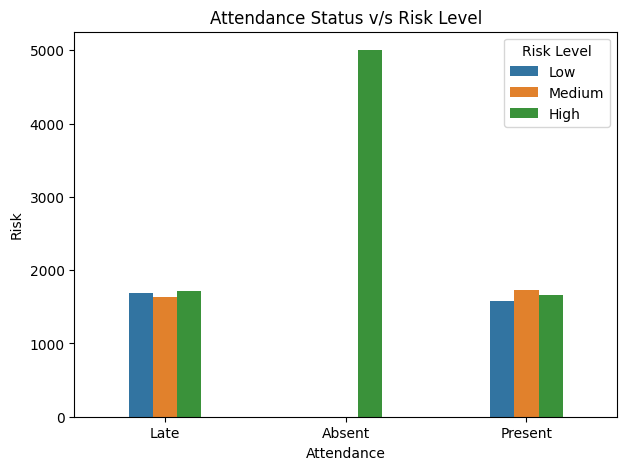

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x='Attendance Status', hue='Risk Level', data=df, width=0.4)

plt.title('Attendance Status v/s Risk Level')
plt.xlabel('Attendance')
plt.ylabel('Risk')
plt.legend(title='Risk Level')

In [18]:
def findoutliers(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

In [19]:
for col in numeric:
    outliers = findoutliers(df[col])
    df = df[~outliers]

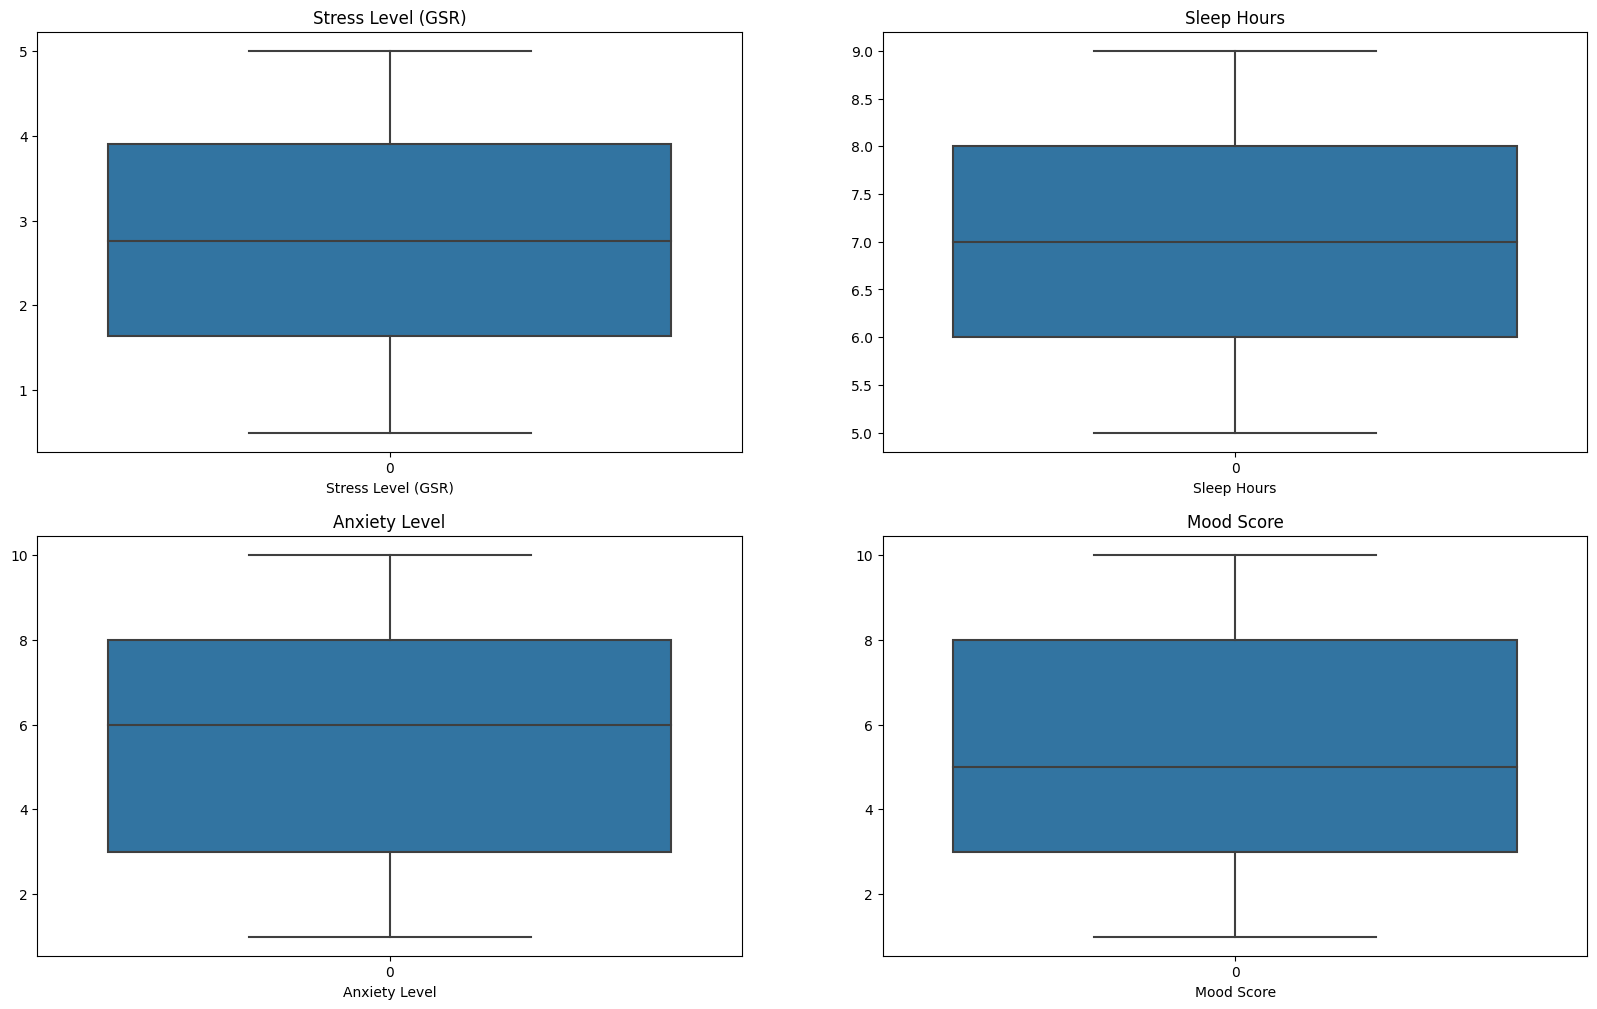

In [20]:
import warnings

def plot_multiple_boxplots(df):
  columns = df.columns
  plt.figure(figsize=(20,12))
  
  for i in range(len(columns)):
      plt.subplot(2,2,i+1)
      sns.boxplot(df[columns[i]])
      warnings.filterwarnings("ignore")
      plt.title(columns[i])
      plt.xlabel(columns[i])
  
  plt.show()

plot_multiple_boxplots(numeric)

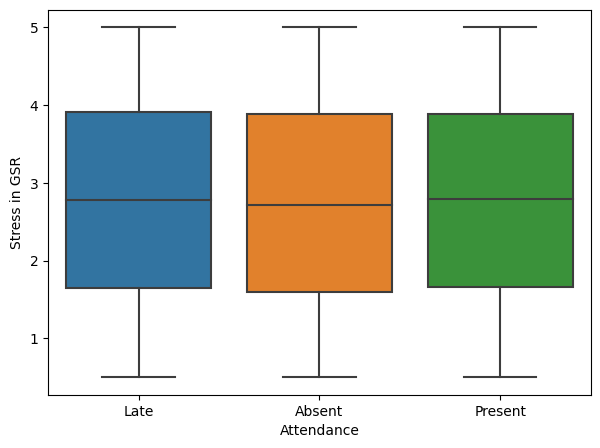

Attendance Status
Absent     2.744024
Late       2.775401
Present    2.768151
Name: Stress Level (GSR), dtype: float64

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Attendance Status',y='Stress Level (GSR)',data=df)
plt.xlabel('Attendance')
plt.ylabel('Stress in GSR')
plt.show()
df.groupby('Attendance Status')['Stress Level (GSR)'].mean()

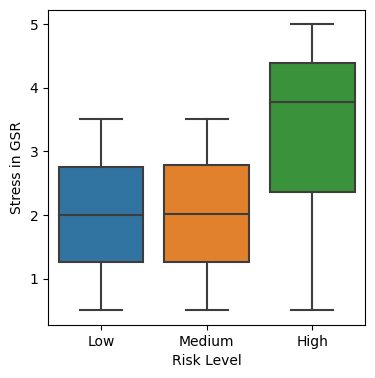

Risk Level
High      3.353805
Low       2.011052
Medium    2.017029
Name: Stress Level (GSR), dtype: float64


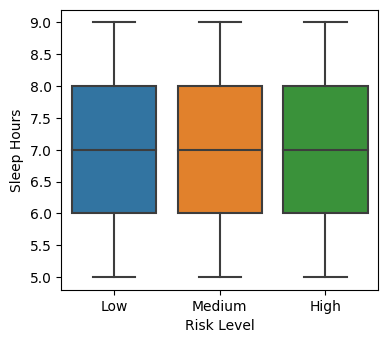

Risk Level
High      7.005668
Low       6.980923
Medium    6.990027
Name: Sleep Hours, dtype: float64


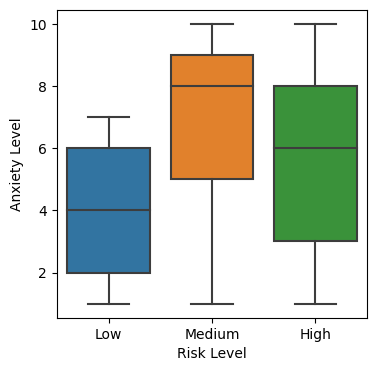

Risk Level
High      5.597733
Low       3.951391
Medium    6.977904
Name: Anxiety Level, dtype: float64


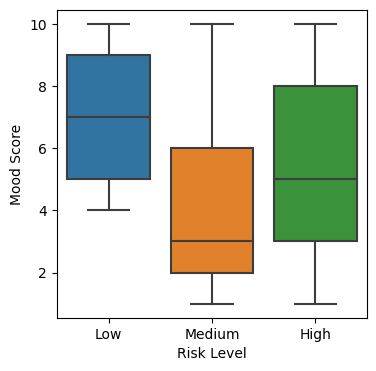

Risk Level
High      5.469690
Low       6.952002
Medium    4.030158
Name: Mood Score, dtype: float64


In [22]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
sns.boxplot(x='Risk Level',y='Stress Level (GSR)',data=df)
plt.xlabel('Risk Level')
plt.ylabel('Stress in GSR')
plt.show()
print(df.groupby('Risk Level')['Stress Level (GSR)'].mean())

plt.figure(figsize=(9,8))
plt.subplot(2,2,2)
sns.boxplot(x='Risk Level',y='Sleep Hours',data=df)
plt.xlabel('Risk Level')
plt.ylabel('Sleep Hours')
plt.show()
print(df.groupby('Risk Level')['Sleep Hours'].mean())

plt.figure(figsize=(4,4))
sns.boxplot(x='Risk Level',y='Anxiety Level',data=df)
plt.xlabel('Risk Level')
plt.ylabel('Anxiety Level')
plt.show()
print(df.groupby('Risk Level')['Anxiety Level'].mean())

plt.figure(figsize=(4,4))
sns.boxplot(x='Risk Level',y='Mood Score',data=df)
plt.xlabel('Risk Level')
plt.ylabel('Mood Score')
plt.show()
print(df.groupby('Risk Level')['Mood Score'].mean())

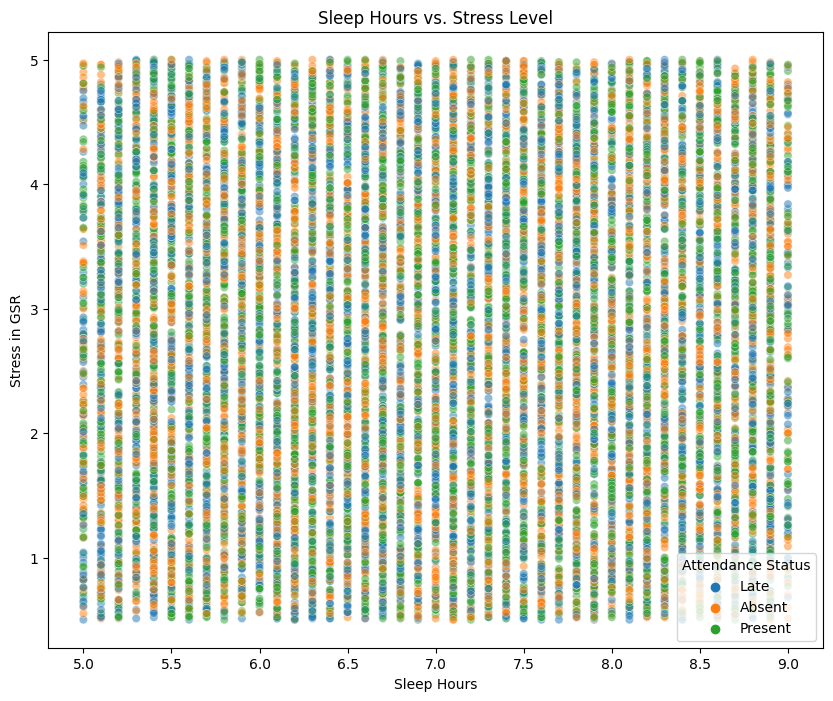

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Sleep Hours',y='Stress Level (GSR)',hue='Attendance Status',data=df,alpha=0.5)

plt.title('Sleep Hours vs. Stress Level')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress in GSR')

plt.show()

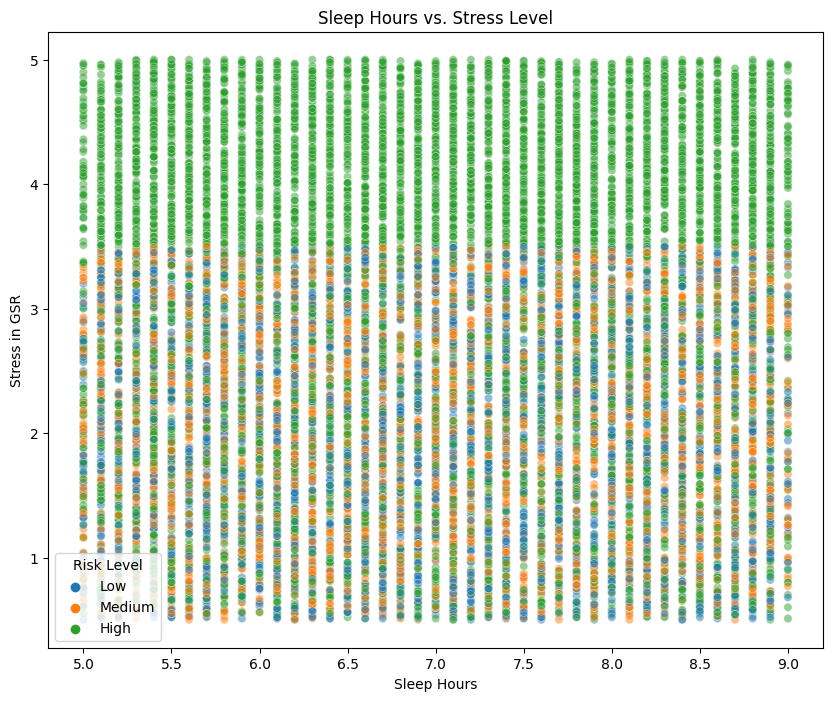

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Sleep Hours',y='Stress Level (GSR)',hue='Risk Level',data=df,alpha=0.5)

plt.title('Sleep Hours vs. Stress Level')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress in GSR')

plt.show()

In [25]:
data=df.copy()
data=data.drop(['Student ID','Date','Class Time'],axis=1)
data.head(10)

,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,Late,0.92,7.6,6,6,Low
1,Late,1.17,6.0,6,2,Medium
2,Late,4.56,6.3,4,8,High
3,Late,3.07,9.0,2,10,Low
4,Absent,3.93,7.4,9,4,High
5,Present,4.96,6.6,5,9,High
6,Absent,2.93,6.8,4,5,High
7,Absent,2.17,8.4,9,9,High
8,Absent,4.40,5.9,4,4,High
9,Late,1.44,7.7,3,7,Low


In [26]:
data.isnull().sum()

Attendance Status     0
Stress Level (GSR)    0
Sleep Hours           0
Anxiety Level         0
Mood Score            0
Risk Level            0
dtype: int64

In [27]:
data.duplicated().sum()

18

In [28]:
data = data.drop_duplicates(keep=False)

In [29]:
data.duplicated().sum()

0

In [30]:
data.head(10)

,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,Late,0.92,7.6,6,6,Low
1,Late,1.17,6.0,6,2,Medium
2,Late,4.56,6.3,4,8,High
3,Late,3.07,9.0,2,10,Low
4,Absent,3.93,7.4,9,4,High
5,Present,4.96,6.6,5,9,High
6,Absent,2.93,6.8,4,5,High
7,Absent,2.17,8.4,9,9,High
8,Absent,4.40,5.9,4,4,High
9,Late,1.44,7.7,3,7,Low


In [31]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler

*ENCODING DATA*

In [32]:
# Columns for One Hot Encoding : {'Attendance Status'}
# Columns for Label Encoding : {'Risk Level'}

one_hot_encoder = OneHotEncoder(drop='first',dtype=np.int64,sparse=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [33]:
data['Risk Level']=label_encoder.fit_transform(np.array(data['Risk Level']).reshape(-1,1))
data['Attendance Status']=label_encoder.fit_transform(np.array(data['Attendance Status']).reshape(-1,1))

In [34]:
# encoded_data = one_hot_encoder.fit_transform(data[['Attendance Status']])
# feature_names = one_hot_encoder.get_feature_names_out(['Attendance Status'])
# encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
# data = data.drop(['Attendance Status'], axis=1)
# data = pd.concat([data, encoded_df], axis=1)

In [35]:
data

,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,0.92,7.6,6,6,1
1,1,1.17,6.0,6,2,2
2,1,4.56,6.3,4,8,0
3,1,3.07,9.0,2,10,1
4,0,3.93,7.4,9,4,0
...,...,...,...,...,...,...
14995,1,1.30,7.2,7,10,1
14996,0,1.07,7.9,4,6,0
14997,0,1.67,7.2,3,5,0
14998,1,0.99,7.2,10,9,2


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14964 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attendance Status   14964 non-null  int64  
 1   Stress Level (GSR)  14964 non-null  float64
 2   Sleep Hours         14964 non-null  float64
 3   Anxiety Level       14964 non-null  int64  
 4   Mood Score          14964 non-null  int64  
 5   Risk Level          14964 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 818.3 KB


*SCALING DATA*

In [37]:

columns=data.columns
data=StandardScaler().fit_transform(data)
data=pd.DataFrame(data,columns=columns)
data

,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,0.002623,-1.414150,0.523978,0.158797,0.184195,0.410014
1,0.002623,-1.222150,-0.866282,0.158797,-1.209806,1.632457
2,0.002623,1.381376,-0.605608,-0.538354,0.881195,-0.812430
3,0.002623,0.237054,1.740455,-1.235505,1.578195,0.410014
4,-1.224095,0.897535,0.350195,1.204524,-0.512806,-0.812430
...,...,...,...,...,...,...
14959,0.002623,-1.122310,0.176413,0.507373,1.578195,0.410014
14960,-1.224095,-1.298950,0.784651,-0.538354,0.184195,-0.812430
14961,-1.224095,-0.838149,0.176413,-0.886930,-0.164306,-0.812430
14962,0.002623,-1.360390,0.176413,1.553100,1.229695,1.632457


*HEATMAP*

<Axes: >

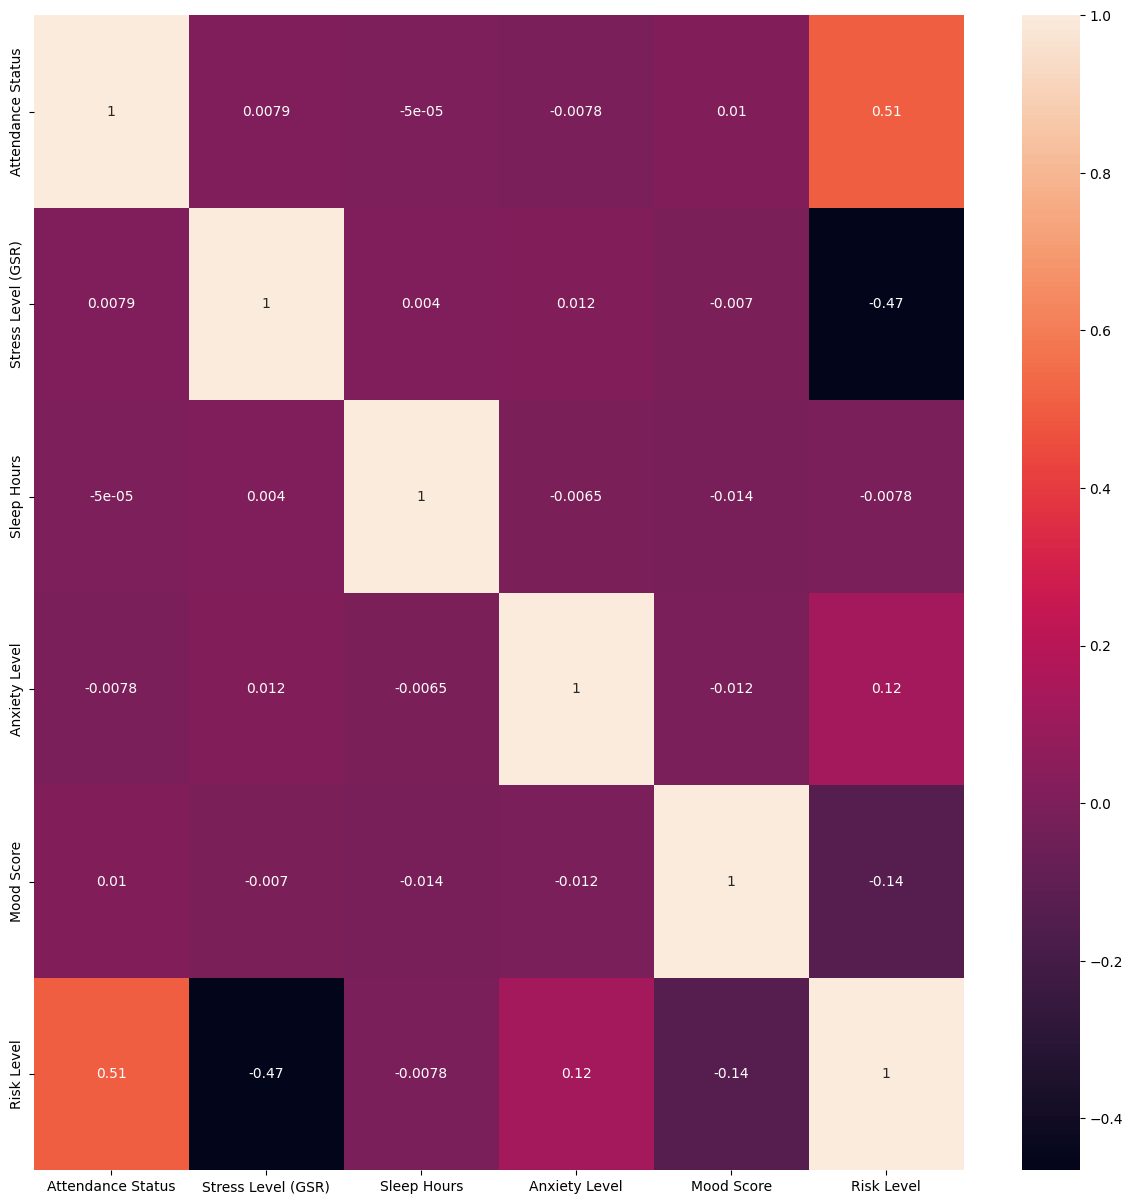

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

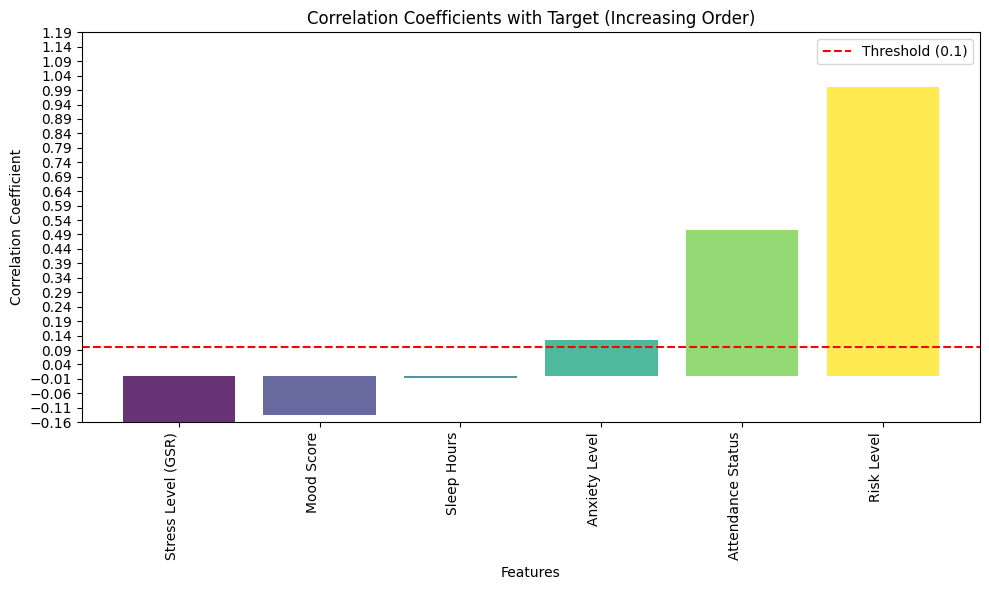

Attendance Status     0.505503
Stress Level (GSR)   -0.465847
Sleep Hours          -0.007801
Anxiety Level         0.124427
Mood Score           -0.136077
Risk Level            1.000000
Name: Risk Level, dtype: float64

In [39]:
def select_features_pearson_corr(df, target_col):

    corr_target = df.corr()[target_col]
    return corr_target

def plot_correlation_barplot(corr_series):

    plt.figure(figsize=(10, 6))

    # Sort correlation coefficients in increasing order
    corr_series_sorted = corr_series.sort_values(ascending=True)
    
        # Create a colormap
    cmap = plt.cm.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(corr_series_sorted)))

    # Create the bar plot
    plt.bar(range(len(corr_series_sorted)), corr_series_sorted, color=colors, alpha=0.8)
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.title('Correlation Coefficients with Target (Increasing Order)')
    
    # Set y-axis limits and subdivisions
    plt.ylim(-0.14, 1.1)  # Adjust y-axis limits to include -0.14 and 1.1
    plt.yticks(np.arange(-0.16, 1.2, 0.05))  # Set subdivisions of 0.05

    # Plot horizontal line at y=0.1
    plt.axhline(y=0.1, color='red', linestyle='--', label='Threshold (0.1)')
    plt.legend()

    plt.xticks(range(len(corr_series_sorted.index.to_numpy())), 
               corr_series_sorted.index.to_numpy(), 
               rotation=90, ha='right'
              )
    plt.tight_layout()
    plt.show()

target_col = 'Risk Level'

# Calculate correlation coefficients
corr_series = select_features_pearson_corr(data, target_col)

# Plot correlation barplots
plot_correlation_barplot(corr_series)

corr_series

In [40]:
X=data.drop(['Risk Level','Sleep Hours'],axis=1)